In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cobra
import numpy as np
import seaborn as sns
import itertools
from matplotlib.colors import LogNorm, Normalize


In [16]:
df = pd.read_csv('kbase_reaction_per_model.csv')

In [12]:
import os
modelseed_dpath = os.path.join('..', '..', 'ModelSEEDDatabase', 'Biochemistry',  'Pathways')
os.listdir(modelseed_dpath)

['HopeScenarios.txt',
 'KEGG.pathways',
 'ModelSEED_Subsystems.tsv',
 'plantdefault.pathways.tsv']

In [14]:
modelseed_pathway_df = pd.read_csv(os.path.join(modelseed_dpath, 'ModelSEED_Subsystems.tsv',), sep='\t')

In [15]:
modelseed_pathway_df

,Class,Sub-class,Name,Role,Reaction
0,-,-,CBSS-155864.1.peg.3753,Glutamate synthase [NADPH] small chain (EC 1.4...,rxn00085
1,-,-,COG0523,Carbonic anhydrase (EC 4.2.1.1),rxn00102
2,-,-,COG0523,Dihydroorotase (EC 3.5.2.3),rxn01465
3,-,-,COG0523,GTP cyclohydrolase I (EC 3.5.4.16) type 1,rxn00299
4,-,-,COG0523,GTP cyclohydrolase I (EC 3.5.4.16) type 1,rxn00302
...,...,...,...,...,...
9815,Virulence,Resistance to antibiotics and toxic compounds,Resistance_to_fluoroquinolones,DNA gyrase subunit B (EC 5.99.1.3),rxn13783
9816,Virulence,Resistance to antibiotics and toxic compounds,Resistance_to_fluoroquinolones,Topoisomerase IV subunit A (EC 5.99.1.-),rxn13783
9817,Virulence,Resistance to antibiotics and toxic compounds,Resistance_to_fluoroquinolones,Topoisomerase IV subunit B (EC 5.99.1.-),rxn13783
9818,Virulence,"Type III, Type IV, Type VI, ESAT secretion sys...",Type_IV_pilus,3-dehydroquinate synthase (EC 4.2.3.4),rxn02212


In [21]:
df.id.str.rsplit('_', n=1, expand=True)

,0,1
0,EX_cpd15302,b
1,EX_cpd02701,b
2,EX_cpd11416,b
3,EX_cpd00067,b
4,EX_cpd00075,b
...,...,...
16683,rxn02897,c0
16684,rxn08333,c0
16685,rxn03537,c0
16686,rxn08713,c0


In [22]:
df['Reaction'] = df.id.str.rsplit('_', n=1, expand=True)[0]

In [23]:
df.head()

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction
0,0,EX_cpd15302_b,EX_cpd15302_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd15302
1,1,EX_cpd02701_b,EX_cpd02701_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd02701
2,2,EX_cpd11416_b,EX_cpd11416_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd11416
3,3,EX_cpd00067_b,EX_cpd00067_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00067
4,4,EX_cpd00075_b,EX_cpd00075_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00075


In [51]:
modelseed_pathway_in_model_df = modelseed_pathway_df.loc[modelseed_pathway_df.Reaction.isin(df.Reaction)]

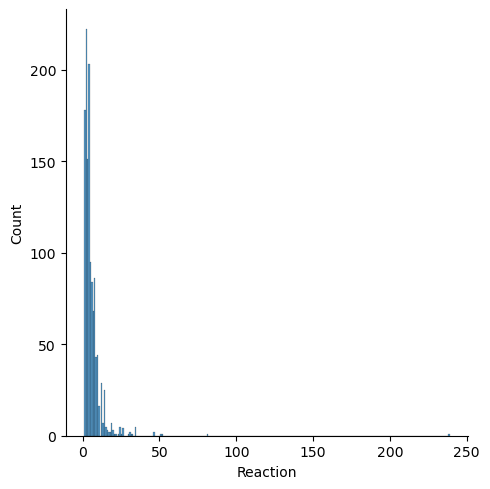

In [53]:
sns.displot(modelseed_pathway_in_model_df.Reaction.value_counts())
plt.show()

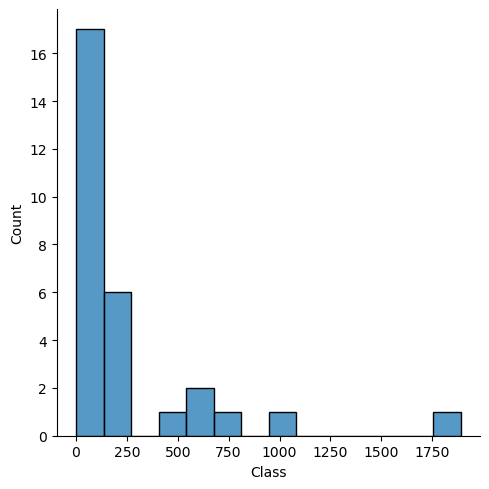

In [54]:
sns.displot(modelseed_pathway_in_model_df.Class.value_counts())
plt.show()

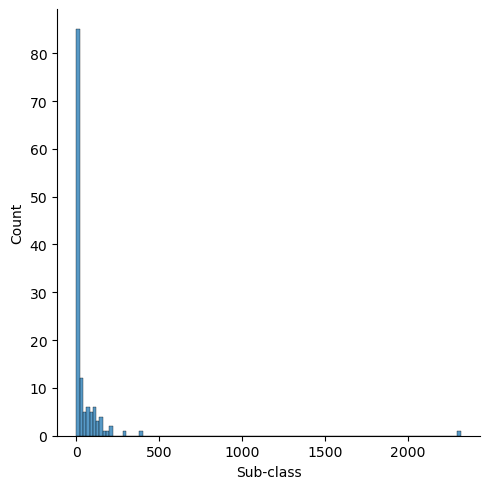

In [55]:
sns.displot(modelseed_pathway_in_model_df['Sub-class'].value_counts())
plt.show()

In [56]:
modelseed_pathway_in_model_df[['Class', 'Sub-class']].value_counts().reset_index().head(30)



,Class,Sub-class,0
0,Experimental Subsystems,-,1553
1,Carbohydrates,Central carbohydrate metabolism,372
2,Amino Acids and Derivatives,Branched-chain amino acids,288
3,"Fatty Acids, Lipids, and Isoprenoids",Fatty acids,216
4,"Cofactors, Vitamins, Prosthetic Groups, Pigments",Folate and pterines,215
5,"Fatty Acids, Lipids, and Isoprenoids",Phospholipids,181
6,Clustering-based subsystems,-,171
7,Experimental Subsystems,Plant-Prokaryote DOE project,169
8,Clustering-based subsystems,Fatty acid metabolic cluster,154
9,Stress Response,Oxidative stress,148


In [57]:
modelseed_pathway_in_model_df['Class'].value_counts()# .reset_index()['index'].to_list()



Experimental Subsystems                             1891
Carbohydrates                                       1080
Amino Acids and Derivatives                          793
Fatty Acids, Lipids, and Isoprenoids                 651
Clustering-based subsystems                          553
Cofactors, Vitamins, Prosthetic Groups, Pigments     468
Nucleosides and Nucleotides                          246
Cell Wall and Capsule                                239
Protein Metabolism                                   233
Membrane Transport                                   217
Respiration                                          210
Stress Response                                      190
Metabolism of Aromatic Compounds                      90
Virulence                                             79
Regulation and Cell signaling                         66
RNA Metabolism                                        62
Nitrogen Metabolism                                   56
Sulfur Metabolism              

In [58]:
modelseed_pathway_in_model_df.loc[modelseed_pathway_in_model_df.Class.isin(['Clustering-based subsystems']), 'Sub-class'].value_counts()

-                                                                                                          171
Fatty acid metabolic cluster                                                                               154
Hypothetical lipase related to Phosphatidate metabolism                                                     26
relates permeases with chi component of DNA pol and Val tRNA syn                                            20
Clustering-based subsystems                                                                                 19
contains Thr-tRNA-syn, pyridoxine biosyn, lipid A biosyn, 3 hypos                                           16
Related to N-acetylglucosamine utilization subsystem?                                                       14
Mycocerosic acid and related Polyketides biosynthesis clusters                                              13
Two related proteases                                                                                       13
C

In [46]:
reaction_classes = [
 'Carbohydrates',
 'Amino Acids and Derivatives',
 'Fatty Acids, Lipids, and Isoprenoids',
 #'Clustering-based subsystems',
 'Cofactors, Vitamins, Prosthetic Groups, Pigments',
 'Nucleosides and Nucleotides',
 'Cell Wall and Capsule',
 'Protein Metabolism',
 'Membrane Transport',
 'Respiration',
 'Stress Response',
 'Metabolism of Aromatic Compounds',
 'Virulence',
 'Regulation and Cell signaling',
 'RNA Metabolism',
 'Nitrogen Metabolism',
 'Sulfur Metabolism',
 'Phosphorus Metabolism',
 'Miscellaneous',
 'DNA Metabolism',
 'Motility and Chemotaxis',
 'Secondary Metabolism',
]

In [60]:
classes_for_merge = modelseed_pathway_in_model_df.loc[modelseed_pathway_in_model_df['Class'].isin(reaction_classes), ['Class', 'Reaction']].drop_duplicates()

In [61]:
classes_for_merge

,Class,Reaction
40,Amino Acids and Derivatives,rxn00717
41,Amino Acids and Derivatives,rxn01025
44,Amino Acids and Derivatives,rxn00283
47,Amino Acids and Derivatives,rxn00806
48,Amino Acids and Derivatives,rxn00903
...,...,...
9789,Virulence,rxn10481
9803,Virulence,rxn02011
9804,Virulence,rxn08040
9818,Virulence,rxn02212


In [163]:
classes_for_merge['foo'] = 1
pdf = classes_for_merge.pivot_table(columns='Class', index='Reaction', aggfunc='count', fill_value=0, values='foo')
pdf['All'] = pdf.sum(axis=1)
pdf.loc[pdf.All > 4, ].sum().nlargest(n=10)

Class
All                                                 114
Amino Acids and Derivatives                          21
Fatty Acids, Lipids, and Isoprenoids                 20
Metabolism of Aromatic Compounds                     20
Carbohydrates                                        18
Cofactors, Vitamins, Prosthetic Groups, Pigments     11
Miscellaneous                                        11
Virulence                                             4
Protein Metabolism                                    3
RNA Metabolism                                        3
dtype: int64

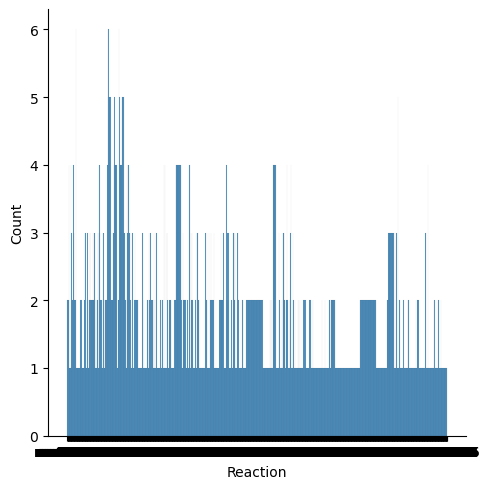

In [66]:
sns.displot(data=classes_for_merge, x='Reaction')
plt.show()

In [62]:
df

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction
0,0,EX_cpd15302_b,EX_cpd15302_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd15302
1,1,EX_cpd02701_b,EX_cpd02701_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd02701
2,2,EX_cpd11416_b,EX_cpd11416_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd11416
3,3,EX_cpd00067_b,EX_cpd00067_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00067
4,4,EX_cpd00075_b,EX_cpd00075_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00075
...,...,...,...,...,...,...,...,...,...,...,...
16683,16683,rxn02897_c0,Nicotinate_nucleotide_dimethylbenzimidazole_ph...,Union,gapfill,NaN,False,True,NaN,Unknown,rxn02897
16684,16684,rxn08333_c0,1_4_dihydroxy_2_naphthoate_octaprenyltransfera...,Union,gapfill,NaN,False,True,NaN,Unknown,rxn08333
16685,16685,rxn03537_c0,R05222_c0,Union,gapfill,NaN,False,True,NaN,Unknown,rxn03537
16686,16686,rxn08713_c0,heptosyltransferase_IV_LPS_core_synthesis_c0,Union,gapfill,NaN,False,True,NaN,Unknown,rxn08713


In [68]:
class_df = pd.merge(df, classes_for_merge, on='Reaction', how='left')

In [70]:
class_df.tail()

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction,Class
22106,16683,rxn02897_c0,Nicotinate_nucleotide_dimethylbenzimidazole_ph...,Union,gapfill,NaN,False,True,NaN,Unknown,rxn02897,"Cofactors, Vitamins, Prosthetic Groups, Pigments"
22107,16684,rxn08333_c0,1_4_dihydroxy_2_naphthoate_octaprenyltransfera...,Union,gapfill,NaN,False,True,NaN,Unknown,rxn08333,"Cofactors, Vitamins, Prosthetic Groups, Pigments"
22108,16685,rxn03537_c0,R05222_c0,Union,gapfill,NaN,False,True,NaN,Unknown,rxn03537,"Cofactors, Vitamins, Prosthetic Groups, Pigments"
22109,16686,rxn08713_c0,heptosyltransferase_IV_LPS_core_synthesis_c0,Union,gapfill,NaN,False,True,NaN,Unknown,rxn08713,Cell Wall and Capsule
22110,16687,rxn08712_c0,heptosyltransferase_III_LPS_core_synthesis_c0,Union,gapfill,NaN,False,True,NaN,Unknown,rxn08712,Cell Wall and Capsule


In [83]:
tot_class_pdf = class_df.pivot_table(index=['model', 'Class'], columns='status', values='Reaction', aggfunc='count', fill_value=0).reset_index()


In [84]:
tot_class_pdf['Genes Annot.'] = tot_class_pdf.hasgpr
tot_class_pdf['No Genes'] = tot_class_pdf.hasgpr + tot_class_pdf.nogpr
tot_class_pdf['Gapfill Rxn'] = tot_class_pdf.hasgpr + tot_class_pdf.nogpr + tot_class_pdf['gapfill']


In [91]:
sns.color_palette(n_colors=3)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

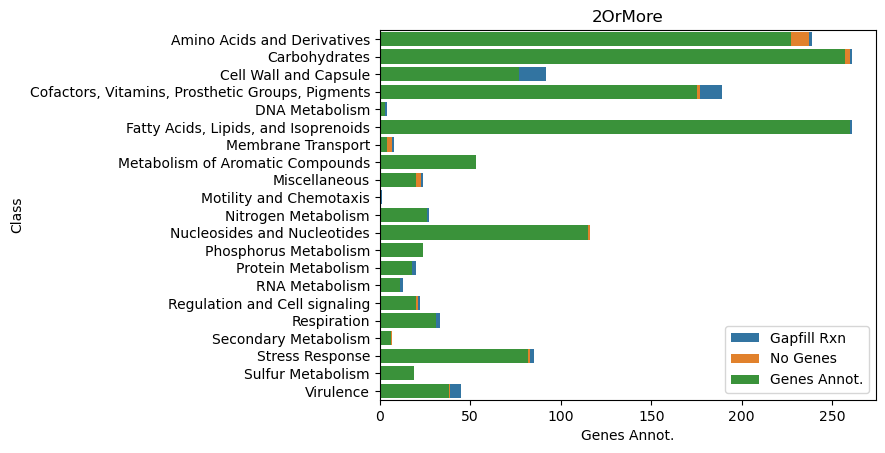

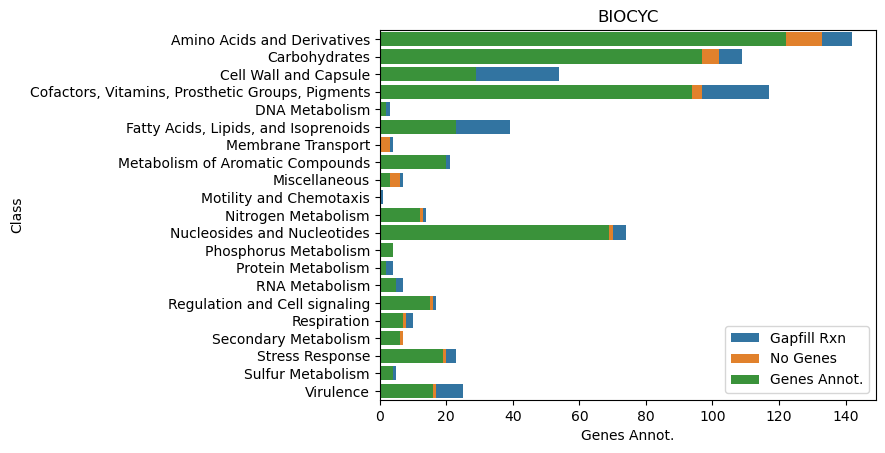

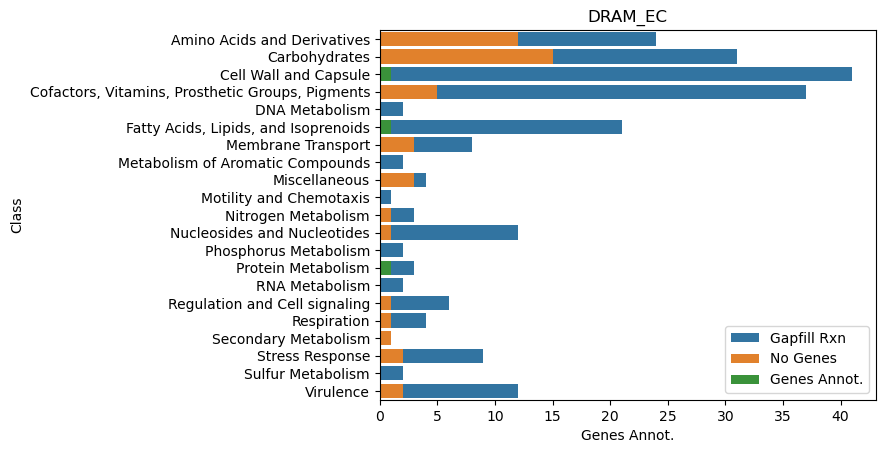

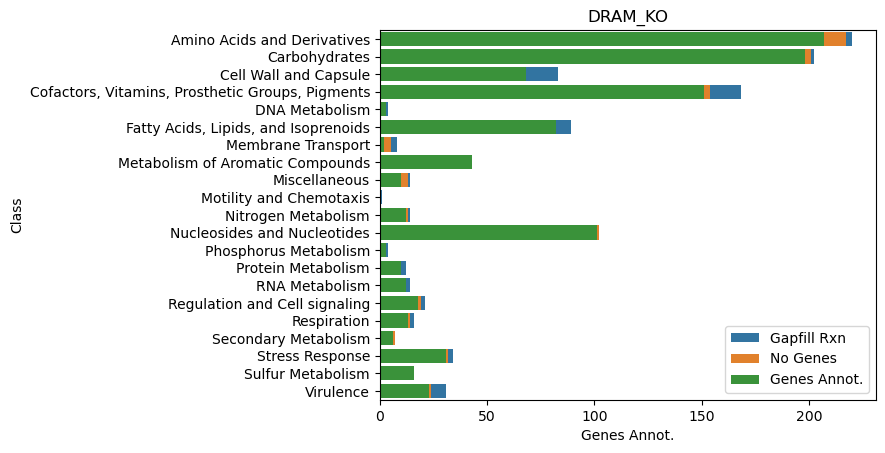

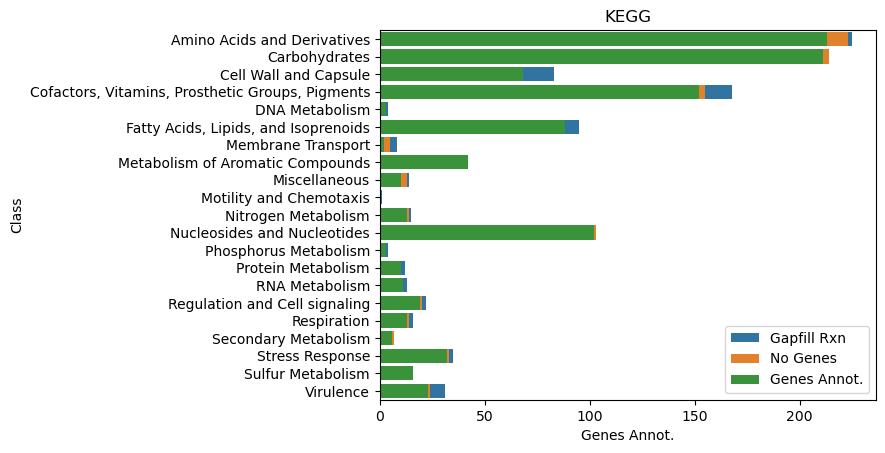

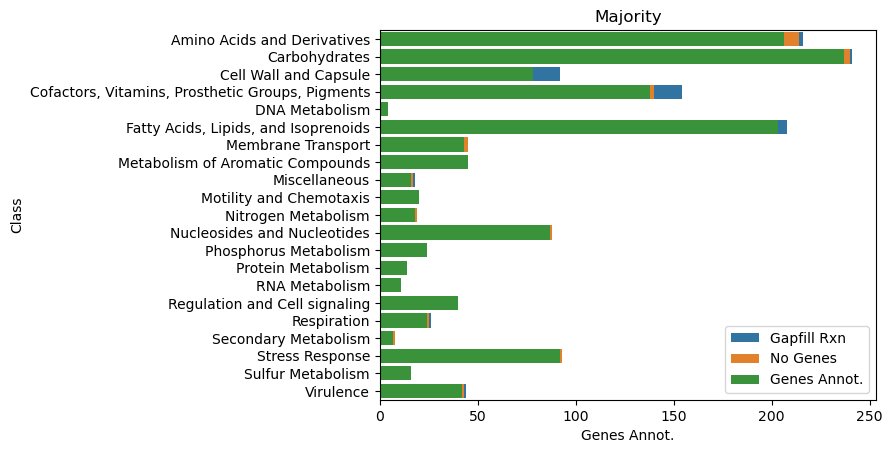

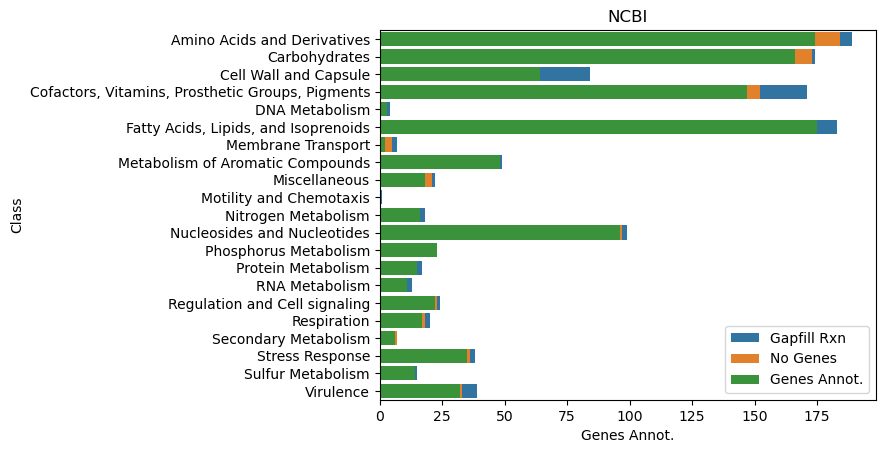

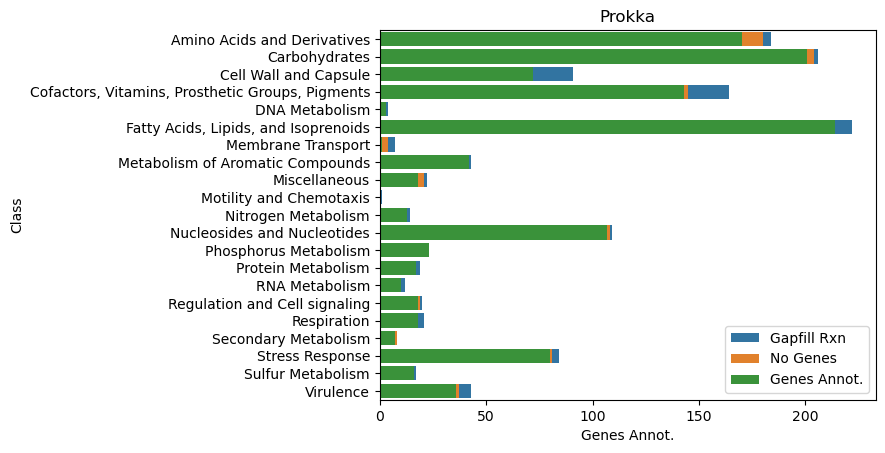

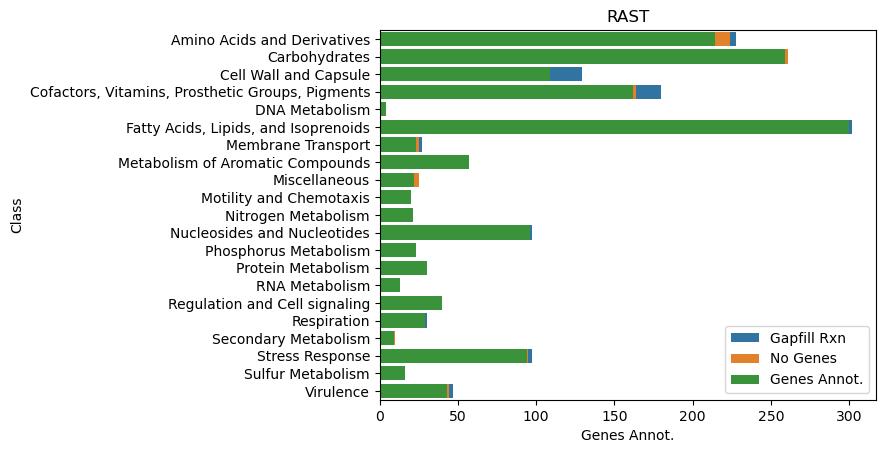

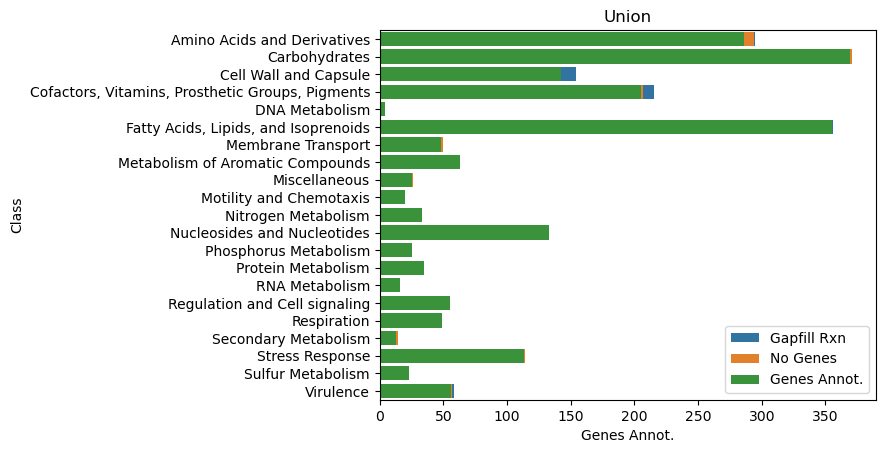

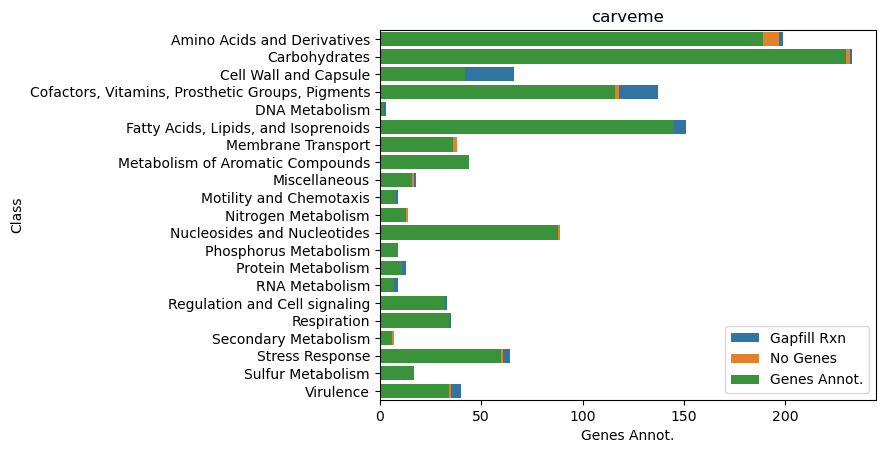

In [93]:
tot_class_pdf
for m in tot_class_pdf.model.unique():
    for l,c in zip(['Gapfill Rxn', 'No Genes', 'Genes Annot.'], sns.color_palette(n_colors=3)):
        sns.barplot(data=tot_class_pdf.loc[tot_class_pdf.model.isin([m])], 
                    y='Class', x=l, color=c, label=l)
    plt.legend()
    plt.title(m)
    plt.show()
    

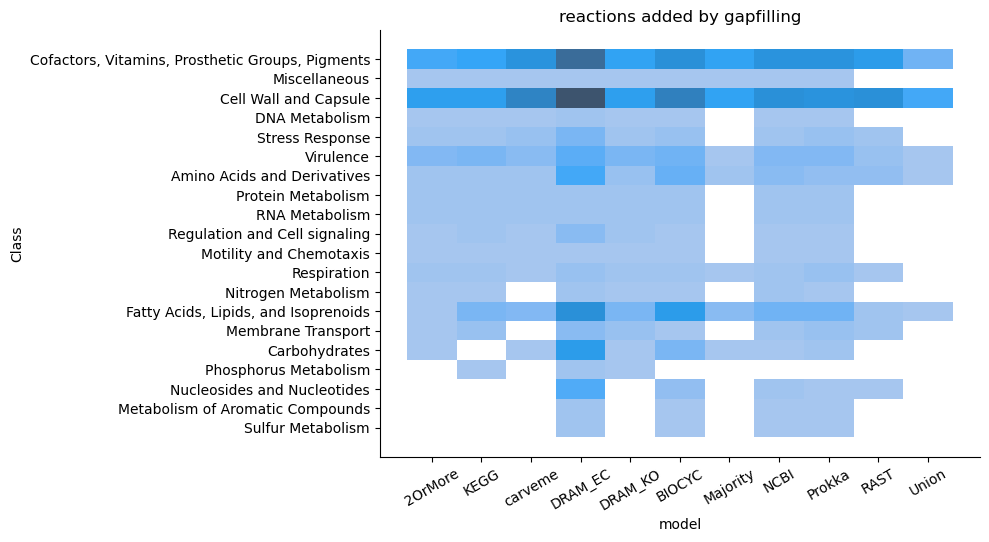

In [202]:
sns.displot(data=class_df.loc[class_df.status.isin(['gapfill'])], x='model', y='Class', kind='hist', aspect=2, legend=True)
plt.xticks(rotation=30)
plt.title('reactions added by gapfilling')
plt.show()

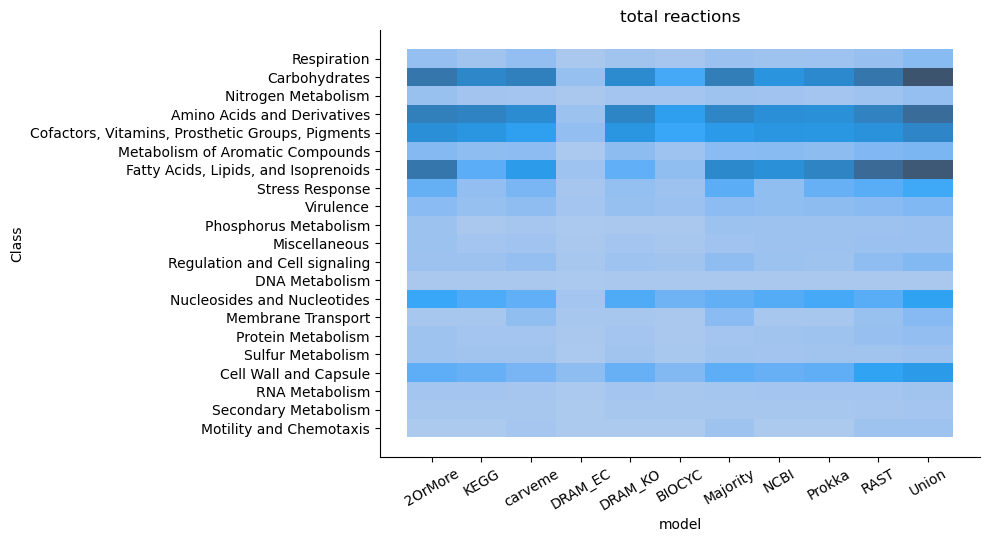

In [201]:
sns.displot(data=class_df.loc[~class_df.Class.isna()], x='model', y='Class', kind='hist', aspect=2)
plt.xticks(rotation=30)
plt.title('total reactions')
plt.show()

In [98]:
class_df.status.value_counts()

hasgpr              18428
nogpr                1585
gapfill              1099
exchange              882
exchange_gapfill      117
Name: status, dtype: int64

Reaction
EX_cpd00006    0
EX_cpd00010    0
EX_cpd00012    0
EX_cpd00013    0
EX_cpd00018    0
              ..
rxn14120       0
rxn14418       0
rxn14419       0
rxn16108       0
rxn40040       0
Name: Class, Length: 284, dtype: int64

In [99]:
class_df.status.unique()

array(['exchange', 'hasgpr', 'nogpr', 'exchange_gapfill', 'gapfill'],
      dtype=object)

In [104]:
status_map = {'exchange' :3, 'hasgpr' : 5, 'nogpr' : 4, 'exchange_gapfill' : 2, 'gapfill': 1}
df['status_int'] = df.status.map(status_map)
pdf = df.pivot_table(index='Reaction', columns='model', values='status_int', fill_value=0)

In [193]:
status_map = {'exchange' :3, 'hasgpr' : 5, 'nogpr' : 4, 'exchange_gapfill' : 2, 'gapfill': 1}
status_map = {'hasgpr' : 3, 'nogpr' : 2, 'gapfill': 1}
status_map = {'hasgpr' : 3, 'nogpr' : 3, 'gapfill': 1}
class_df['status_int'] = class_df.status.map(status_map)
pdf = class_df.dropna(subset='Class').pivot_table(index='Reaction', columns='model', values='status_int', fill_value=-10)

In [194]:
class_df.Class.value_counts()

Carbohydrates                                       2303
Amino Acids and Derivatives                         2161
Fatty Acids, Lipids, and Isoprenoids                1927
Cofactors, Vitamins, Prosthetic Groups, Pigments    1700
Nucleosides and Nucleotides                         1022
Cell Wall and Capsule                                969
Stress Response                                      676
Metabolism of Aromatic Compounds                     462
Virulence                                            415
Regulation and Cell signaling                        300
Respiration                                          260
Membrane Transport                                   210
Miscellaneous                                        194
Nitrogen Metabolism                                  192
Protein Metabolism                                   179
Phosphorus Metabolism                                165
Sulfur Metabolism                                    162
RNA Metabolism                 

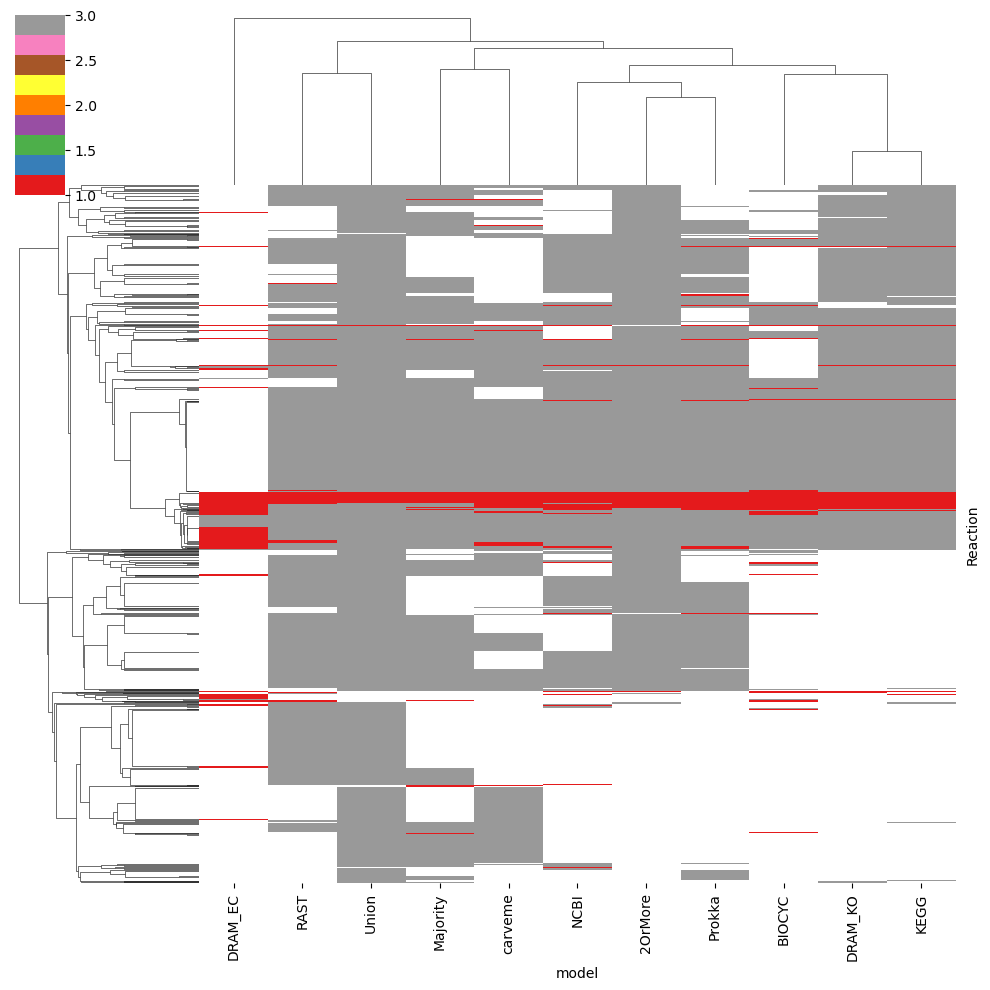

In [195]:

#lut = dict(zip(class_df.Class.unique(), "rbg"))
#samples = np.repeat(list(string.ascii_letters[0:8]),20)[:150]
#sample_cols = dict(zip(set(samples), sns.color_palette("cubehelix", 8)))

# row_colors = pd.DataFrame({'species':species.map(lut),
#                           'sample':[sample_cols[i] for i in samples]})
# g = sns.clustermap(iris, row_colors=row_colors,row_cluster=False)

sns.clustermap(pdf, cmap='Set1', mask=(pdf == -10), yticklabels=False)


plt.show()

In [196]:
df.loc[df.Reaction == 'EX_cpd00001']

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction,status_int
7,7,EX_cpd00001_b,EX_cpd00001_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
1646,1646,EX_cpd00001_e0,EX_H2O_e0,2OrMore,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
1708,1708,EX_cpd00001_b,EX_cpd00001_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
2806,2806,EX_cpd00001_e0,EX_H2O_e0,KEGG,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
2878,2878,EX_cpd00001_b,EX_cpd00001_b,carveme,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
4066,4066,EX_cpd00001_e0,EX_H2O_e0,carveme,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
4182,4182,EX_cpd00001_b,EX_cpd00001_b,DRAM_EC,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
4308,4308,EX_cpd00001_e0,EX_H2O_e0,DRAM_EC,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
4354,4354,EX_cpd00001_b,EX_cpd00001_b,DRAM_KO,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
5416,5416,EX_cpd00001_e0,EX_H2O_e0,DRAM_KO,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4


In [219]:
total_models_per_reaction = class_df.dropna(subset='Class').groupby(['Class', 'Reaction']).model.nunique().reset_index()
gapfill_models_per_reaction = class_df.loc[
    class_df.status.isin(['gapfill']) & ~class_df.Class.isna()].groupby(['Class', 'Reaction']).model.nunique().reset_index()
total_models_per_reaction['stat'] = 'total'
gapfill_models_per_reaction['stat'] = 'gapfill'
total_models_per_reaction = pd.concat(
    [total_models_per_reaction,
    gapfill_models_per_reaction]).reset_index()


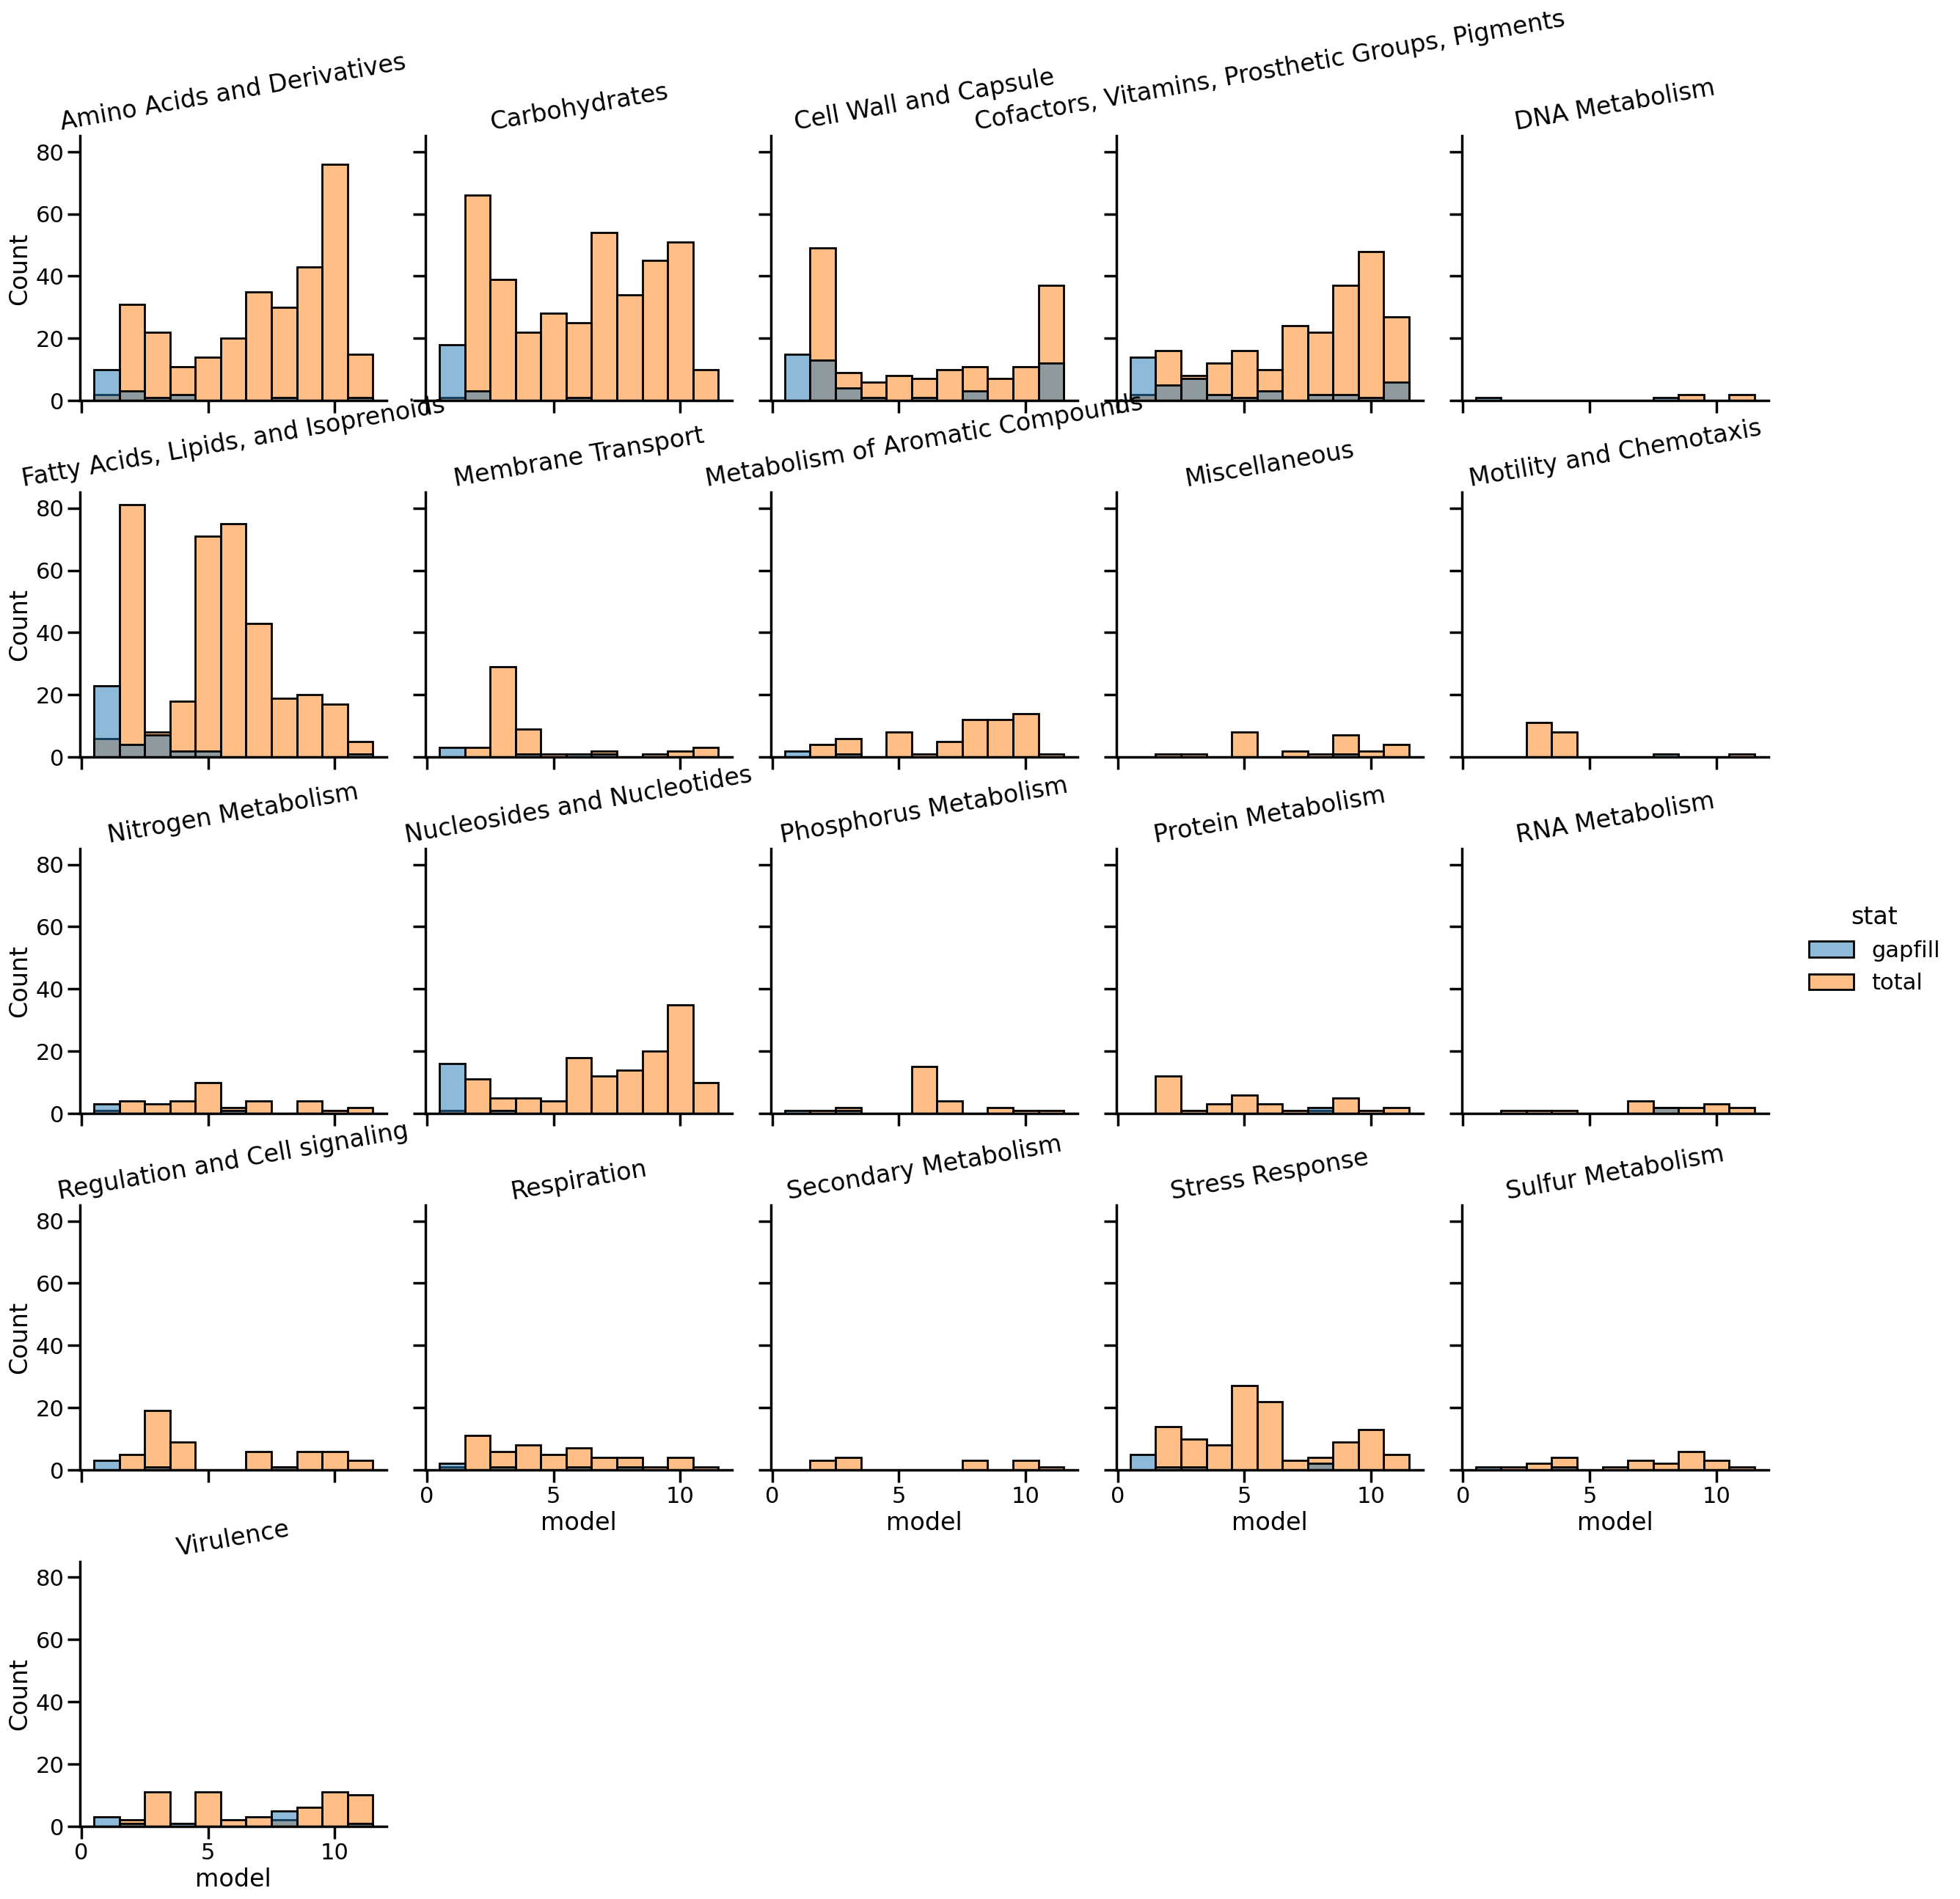

In [239]:
sns.set_context('poster')
sns.displot(data=total_models_per_reaction, x='model', 
            #fill=False, cumulative=True,
            kind='hist', col='Class', col_wrap=5, hue='stat', discrete=True,
            hue_order= ['gapfill', 'total', ],
           ).set_titles(col_template='{col_name}', rotation=10)
plt.show()

In [222]:
total_models_per_reaction

,index,Class,Reaction,model,stat
0,0,Amino Acids and Derivatives,rxn00011,9,total
1,1,Amino Acids and Derivatives,rxn00085,11,total
2,2,Amino Acids and Derivatives,rxn00126,10,total
3,3,Amino Acids and Derivatives,rxn00141,11,total
4,4,Amino Acids and Derivatives,rxn00143,9,total
...,...,...,...,...,...
2379,238,Virulence,rxn10199,8,gapfill
2380,239,Virulence,rxn10481,8,gapfill
2381,240,Virulence,rxn13782,8,gapfill
2382,241,Virulence,rxn13783,8,gapfill
